# Q1 )
#### Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('crime_data.csv')
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


#### heirarchical clustering

In [3]:
#import heirarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
#normalization function
def norm_func(i):
    x = (i-i.min()) / (i.max()-i.min())
    return (x)

In [5]:
df_norm=norm_func(df.iloc[:,1:])
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


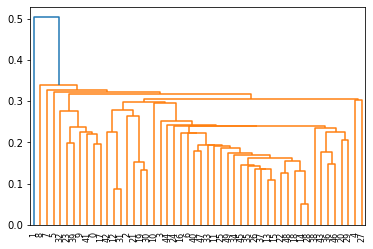

In [6]:
# create dendogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))


In [7]:
#create clusters
hc = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='single')
hc.fit(df_norm)

AgglomerativeClustering(linkage='single', n_clusters=4)

In [8]:
hc.labels_

array([0, 3, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [9]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
y_hc

array([0, 3, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [10]:
Clusters = pd.DataFrame(data=y_hc,columns = ['Clusters'])
Clusters.head()

,Clusters
0,0
1,3
2,0
3,0
4,0


In [11]:
df['Clusters'] = Clusters
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0


In [12]:
df[df['Clusters']==0].head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0


In [13]:
df[df['Clusters']==1]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clusters
7,Delaware,5.9,238,72,15.8,1


In [14]:
df[df['Clusters']==2]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clusters
8,Florida,15.4,335,80,31.9,2


In [15]:
df[df['Clusters']==3]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clusters
1,Alaska,10.0,263,48,44.5,3


#### k means clustering

In [16]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [17]:
df.drop(columns='Clusters',inplace= True)
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [19]:
# Standardisation function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.iloc[:,1:])
print(scaled_df)

[[ 1.25517927  0.79078716 -0.52619514 -0.00345116]
 [ 0.51301858  1.11805959 -1.22406668  2.50942392]
 [ 0.07236067  1.49381682  1.00912225  1.05346626]
 [ 0.23470832  0.23321191 -1.08449238 -0.18679398]
 [ 0.28109336  1.2756352   1.77678094  2.08881393]
 [ 0.02597562  0.40290872  0.86954794  1.88390137]
 [-1.04088037 -0.73648418  0.79976079 -1.09272319]
 [-0.43787481  0.81502956  0.45082502 -0.58583422]
 [ 1.76541475  1.99078607  1.00912225  1.1505301 ]
 [ 2.22926518  0.48775713 -0.38662083  0.49265293]
 [-0.57702994 -1.51224105  1.21848371 -0.11129987]
 [-1.20322802 -0.61527217 -0.80534376 -0.75839217]
 [ 0.60578867  0.94836277  1.21848371  0.29852525]
 [-0.13637203 -0.70012057 -0.03768506 -0.0250209 ]
 [-1.29599811 -1.39102904 -0.5959823  -1.07115345]
 [-0.41468229 -0.67587817  0.03210209 -0.34856705]
 [ 0.44344101 -0.74860538 -0.94491807 -0.53190987]
 [ 1.76541475  0.94836277  0.03210209  0.10439756]
 [-1.31919063 -1.06375661 -1.01470522 -1.44862395]
 [ 0.81452136  1.56654403  0.10

In [20]:
# HOW TO FIND OPTIMUM NUMBER OF CLUSTERS
# the kmeans algorithm aims to choose centroids that minimize the inertia or within clusters sum of squares criterion

In [21]:
wcss = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=12)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

D:\anac\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [22]:
wcss

[200.0,
 104.96163315756873,
 79.95548163171661,
 57.55425863091106,
 50.05119672966492,
 43.74655557175968,
 39.04129249497444,
 36.510380047938455,
 31.07473075771718,
 28.411528116083325]

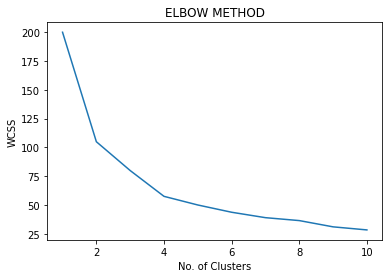

In [23]:
plt.plot(range(1,11),wcss)
plt.title('ELBOW METHOD')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

###### The elbow appear to be smoothening out after four clusters indicating that the optimal number of clusters is 4.

#### dbscan clustering

In [24]:
from sklearn.cluster import DBSCAN

In [26]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [38]:
df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [39]:
array = df.values

In [42]:
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [47]:
from sklearn.preprocessing import StandardScaler
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [48]:
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [62]:
dbscan = DBSCAN(eps=0.8,min_samples=2)
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=2)

In [63]:
dbscan.labels_ # noisy samples are given -1

array([ 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  2,  1,  1,  1, -1,
        0,  1,  3, -1,  3,  1,  4, -1,  1,  1, -1,  1, -1,  3,  2, -1,  1,
        1,  1,  5,  1, -1,  4,  1, -1, -1,  5, -1,  1,  5,  1,  1,  1],
      dtype=int64)

In [65]:
cl = pd.DataFrame(dbscan.labels_, columns=['cluster'])
cl.head()

,cluster
0,0
1,-1
2,-1
3,-1
4,-1


In [66]:
pd.concat([df,cl],axis=1)

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,-1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1


# Q 2)

#### Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. Draw the inferences from the clusters obtained.

In [76]:
air = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')
air.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [77]:
air.shape

(3999, 12)

#### heirarchical c;ustering

In [78]:
# Normalization Function
def norm_func1(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [81]:
df_norm1 = norm_func1(air.iloc[:,1:])
df_norm1.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,0.043172,0.012927,0.264879,0.007252,0.003063,0.065020,0.134906,0.014929,0.025917,0.496330,0.370343
std,0.059112,0.069399,0.344230,0.073825,0.048810,0.091590,0.111672,0.045436,0.071569,0.248991,0.482957
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010868,0.000000,0.000000,0.000000,0.000000,0.004741,0.034884,0.000000,0.000000,0.280685,0.000000
50%,0.025279,0.000000,0.000000,0.000000,0.000000,0.027195,0.139535,0.000000,0.000000,0.493610,0.000000
75%,0.054201,0.000000,0.500000,0.000000,0.000000,0.090261,0.197674,0.010092,0.018868,0.697914,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [82]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 

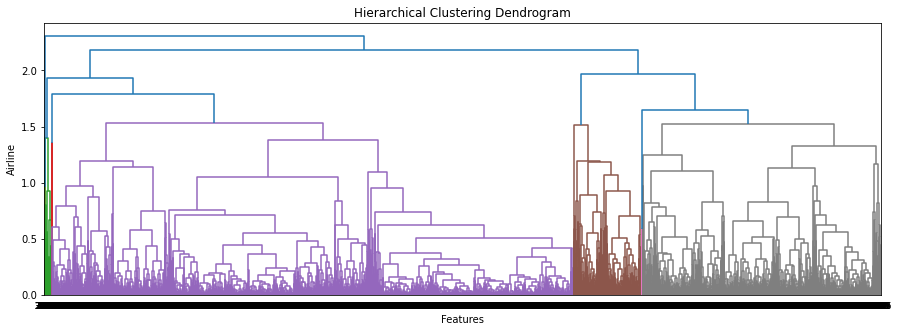

In [84]:
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Features')
plt.ylabel('Airline')
sch.dendrogram(z1,
    leaf_rotation=0., 
    leaf_font_size=8., 
)
plt.show()

In [85]:
air.corr()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909


In [94]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')
hc.fit(df_norm1)

AgglomerativeClustering(linkage='single', n_clusters=4)

In [95]:
hc.labels_

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [96]:
y_hc = hc.fit_predict(df_norm1)
y_hc

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [97]:
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters

,Clusters
0,1
1,1
2,1
3,1
4,0
...,...
3994,0
3995,0
3996,0
3997,1


In [98]:
air['clusters'] = Clusters

In [99]:
air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


#### kmeans clustering

In [102]:
air.drop(columns='clusters',inplace= True)
air.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [103]:
scaled_air = scaler.fit_transform(air.iloc[:,1:])
print(scaled_air)

[[-4.51140783e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.39545434e+00 -7.66919299e-01]
 [-5.39456874e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.37995704e+00 -7.66919299e-01]
 [-3.20031232e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.41192021e+00 -7.66919299e-01]
 ...
 [-4.29480975e-05 -1.86298687e-01  6.83121167e-01 ... -3.62167870e-01
  -1.31560393e+00  1.30391816e+00]
 [-1.85606976e-01 -1.86298687e-01 -7.69578406e-01 ... -9.85033311e-02
  -1.31608822e+00 -7.66919299e-01]
 [-7.00507951e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
  -1.31754109e+00 -7.66919299e-01]]


In [104]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=12)
    kmeans.fit(scaled_air)
    wcss.append(kmeans.inertia_)

In [105]:
wcss

[43989.00000000009,
 35409.51662986136,
 30899.709743249437,
 27154.035327088164,
 24885.4962419996,
 22304.458913056384,
 19502.85609822044,
 17316.753604356454,
 15960.42418877065,
 14728.674847210134]

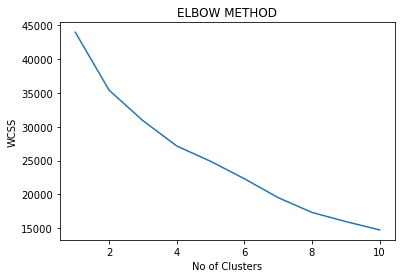

In [106]:
plt.plot(range(1,11),wcss)
plt.title('ELBOW METHOD')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

###### The elbow appear to be smoothening out after four clusters indicating that the optimal number of clusters is 3.

In [107]:
from sklearn.cluster import KMeans
clusters_new = KMeans(n_clusters=3, random_state=12)
clusters_new.fit(scaled_air)

KMeans(n_clusters=3, random_state=12)

In [108]:
air['clusterid_new'] = clusters_new.labels_

In [109]:
air.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


#### dbscan clustering

In [110]:
air.drop(columns='clusterid_new',inplace= True)

In [111]:
array=df.values

In [112]:
array

array([[    1, 28143,     0, ...,     0,  7000,     0],
       [    2, 19244,     0, ...,     0,  6968,     0],
       [    3, 41354,     0, ...,     0,  7034,     0],
       ...,
       [ 4019, 73597,     0, ...,     0,  1402,     1],
       [ 4020, 54899,     0, ...,     1,  1401,     0],
       [ 4021,  3016,     0, ...,     0,  1398,     0]], dtype=int64)

In [113]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [114]:
dbscan = DBSCAN(eps=0.7, min_samples=7)
dbscan.fit(X)

DBSCAN(eps=0.7, min_samples=7)

In [115]:
dbscan.labels_

array([0, 0, 0, ..., 3, 0, 0], dtype=int64)

In [116]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [117]:
pd.concat([air,cl],axis=1)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,3
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0
